In [1]:
import numpy as np              # arrays
import pandas as pd             # dataframes
import matplotlib.pyplot as plt # graphs
import seaborn as sns           # visualisations
from scipy import stats         # statistics

In [2]:
from sklearn.experimental import enable_iterative_imputer # enable experimental imputer
from sklearn.impute import IterativeImputer               # sample imputation
from sklearn import preprocessing                         # encoders, transformations
from sklearn.model_selection import cross_validate        # cross-validation, model evaluation
from sklearn.model_selection import GridSearchCV          # hyper-parameter tuning
from sklearn.linear_model import LogisticRegression       # logistic regression model
from sklearn.svm import SVC                               # support vector machine model
from sklearn.neighbors import KNeighborsClassifier        # k-nearest neighbours model
from sklearn.ensemble import GradientBoostingClassifier   # gradient boosting model
from sklearn.ensemble import VotingClassifier             # voting ensemble model
from sklearn.ensemble import StackingClassifier           # stacking ensemble model
%matplotlib inline

In [3]:
data_raw = pd.read_csv(
    filepath_or_buffer='./input/Speed Dating Data.csv',
    engine='python'
)

In [4]:
# Define a function to plot distribution functions
def plot_distribution(data, bins, title, xlabel, ylabel):
    ax = sns.distplot(
        data,
        bins=bins,
        hist_kws={
            "linewidth": 1,
            'edgecolor': 'black',
            'alpha': 1.0
            },
        kde=False
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    

# Define a function to plot relationship between two features
def plot_relationship(x, y, title, xlabel, ylabel):
    ax = sns.barplot(
        x=x,
        y=y,
        orient='h'
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
# Define a function to print a feature's mean, standard deviation, skewness and kurtosis
def print_moments(title, feature):
    print(title)
    print('Mean: '+'{:>18.2f}'.format(feature.mean()))
    print('Standard deviation: '+'{:.2f}'.format(feature.std()))
    print('Skewness: '+'{:>14.2f}'.format(feature.skew()))
    print('Kurtosis: '+'{:>14.2f}'.format(feature.kurtosis()))

In [5]:
relevant_features = [
    ['iid', 'int16'],
    ['gender', 'bool'],
    ['wave', 'int16'],
    ['position', 'int16'],
    ['order', 'int16'],
    ['pid', 'int16'],
    ['age_o', 'int16'],
    ['pf_o_att', 'int16'],
    ['pf_o_sin', 'int16'],
    ['pf_o_int', 'int16'],
    ['pf_o_fun', 'int16'],
    ['pf_o_amb', 'int16'],
    ['pf_o_sha', 'int16'],
    ['dec_o', 'bool'],
    ['age', 'int16'],
    ['field_cd', 'category'],
    ['imprelig', 'int16'],
    ['goal', 'category'],
    ['date', 'int16'],
    ['go_out', 'int16'],
    ['career_c', 'category'],
    ['sports', 'int16'],
    ['tvsports', 'int16'],
    ['exercise', 'int16'],
    ['dining', 'int16'],
    ['museums', 'int16'],
    ['art', 'int16'],
    ['hiking', 'int16'],
    ['gaming', 'int16'],
    ['clubbing', 'int16'],
    ['reading', 'int16'],
    ['tv', 'int16'],
    ['theater', 'int16'],
    ['movies', 'int16'],
    ['concerts', 'int16'],
    ['music', 'int16'],
    ['shopping', 'int16'],
    ['yoga', 'int16'],
    ['exphappy', 'int16'],
    ['attr1_1', 'int16'],
    ['sinc1_1', 'int16'],
    ['intel1_1', 'int16'],
    ['fun1_1', 'int16'],
    ['amb1_1', 'int16'],
    ['shar1_1', 'int16'],
    ['dec', 'bool'],
    ['like', 'int16'],
    ['match', 'bool']
]

In [6]:
# create new dataframe containing relevant features
data = data_raw[[feature[0] for feature in relevant_features]]

In [7]:
data_raw['career_c'].value_counts()

2.0     2320
7.0     2170
6.0      724
1.0      675
9.0      547
4.0      421
10.0     379
3.0      261
5.0      234
11.0     220
13.0      81
15.0      77
16.0      44
8.0       39
12.0      28
17.0      10
14.0      10
Name: career_c, dtype: int64

In [8]:
data.shape

(8378, 48)

In [9]:
data = data.astype({feature: datatype if all(data[feature].notna().values) 
                                    else 'float32' 
                                    if datatype == 'int16' 
                                    else datatype for (feature, datatype) in relevant_features})

In [10]:
data['match'].value_counts()

False    6998
True     1380
Name: match, dtype: int64

In [11]:
data.isnull().sum()

iid           0
gender        0
wave          0
position      0
order         0
pid          10
age_o       104
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
age          95
field_cd     82
imprelig     79
goal         79
date         97
go_out       79
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
dec           0
like        240
match         0
dtype: int64

In [12]:
partner_accepts = data['dec_o']
round(partner_accepts[partner_accepts == True].count()/partner_accepts.count(),3)

0.42

In [13]:
data.std().sort_values(ascending=False).head(10)

pid         158.584335
iid         158.583367
attr1_1      12.587790
pf_o_att     12.569827
sinc1_1       7.046759
pf_o_sin      7.044133
intel1_1      6.783009
pf_o_int      6.782840
pf_o_sha      6.362691
shar1_1       6.362234
dtype: float64

In [14]:
abs(data.skew()).sort_values(ascending=False).head(10)

pf_o_att    2.176008
attr1_1     2.173592
match       1.808144
go_out      1.204180
movies      1.081646
age_o       1.073471
age         1.069590
gaming      0.821019
music       0.812697
dining      0.808057
dtype: float64

In [15]:
features_selected = [
    'dec_o',
    'attr1_1',
    'sinc1_1',
    'intel1_1',
    'shar1_1',
    'fun1_1',
    'amb1_1',
]

In [16]:
features_selected = [
    'dec_o',
    'pf_o_att',
    'pf_o_sin',
    'pf_o_int',
    'pf_o_fun',
    'pf_o_amb',
    'pf_o_sha',
]

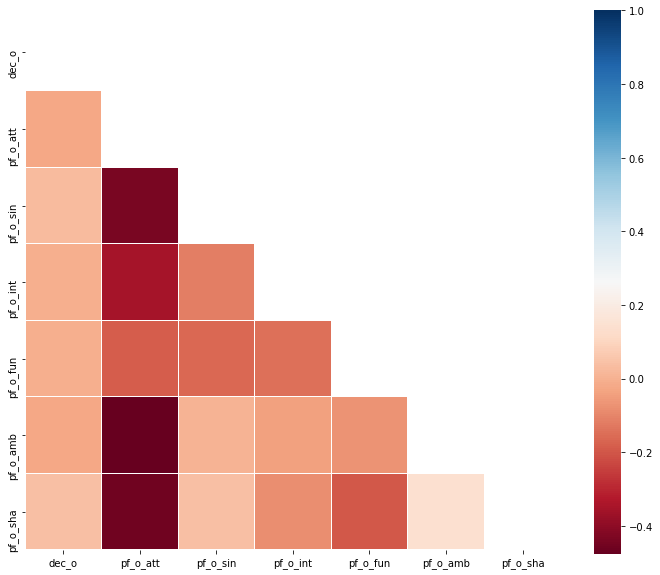

In [17]:
plt.figure(figsize=(12,10))
cmap = plt.cm.RdBu
mask = np.triu(data[features_selected].astype(float).corr())
sns.heatmap(
    data[features_selected].astype(float).corr(),
    square=True,
    cmap=cmap,
    mask=mask,
    linewidths=0.1,
    vmax=1.0,
    linecolor='white'
);

# 상관관계 확인

In [18]:
correlations = data.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
correlations = correlations[correlations != 1]
correlations[correlations > 0.5]

iid       wave       0.996713
wave      pid        0.996712
iid       pid        0.992968
museums   art        0.858548
concerts  music      0.655728
theater   museums    0.549573
          art        0.527193
dec_o     match      0.522326
dec       match      0.521943
theater   movies     0.517874
like      dec        0.513463
dtype: float64

In [19]:
partner_decision_correlations = correlations.loc['dec']
partner_decision_correlations[partner_decision_correlations > 0.01]

match       0.521943
gaming      0.083472
imprelig    0.069210
exercise    0.056415
shar1_1     0.042715
date        0.037687
order       0.031862
movies      0.031152
concerts    0.022550
position    0.022161
amb1_1      0.021869
attr1_1     0.021145
pid         0.016715
age         0.015885
hiking      0.012811
dtype: float64

In [20]:
missing_samples_proportion = data.isnull().sum()/len(data)
missing_samples_proportion.sort_values(ascending=False).head(10)

like        0.028646
career_c    0.016472
pf_o_sha    0.015397
shar1_1     0.014443
pf_o_amb    0.012772
age_o       0.012413
exphappy    0.012055
amb1_1      0.011817
pf_o_fun    0.011697
date        0.011578
dtype: float64

In [21]:
missing_half_samples = missing_samples_proportion[missing_samples_proportion > 0.5].index.values
data.drop(columns=missing_half_samples, inplace=True)

In [22]:
data.shape

(8378, 48)

In [23]:
data.columns

Index(['iid', 'gender', 'wave', 'position', 'order', 'pid', 'age_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'dec_o', 'age', 'field_cd', 'imprelig', 'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'dec',
       'like', 'match'],
      dtype='object')

In [24]:
imputer = IterativeImputer(
    missing_values=np.nan,
    sample_posterior=True,
    n_nearest_features=5,
    min_value=0,
    max_value=100,
    random_state=0
)
imputer.fit(data)
data_imputed = np.around(imputer.transform(data))
data = pd.DataFrame(data_imputed, columns=data.columns)

In [25]:
data = data.astype({feature: datatype if all(data[feature].notna().values) else 'float32' if datatype == 'int16' else datatype for (feature, datatype) in relevant_features})

In [26]:
features_nominal = data.dtypes[data.dtypes == 'category'].index.values
data = pd.get_dummies(data, prefix=features_nominal)

In [27]:
data[[col for col in list(data.columns) if "career" in col]]

,career_c_0.0,career_c_1.0,career_c_2.0,career_c_3.0,career_c_4.0,career_c_5.0,career_c_6.0,career_c_7.0,career_c_8.0,career_c_9.0,career_c_10.0,career_c_11.0,career_c_12.0,career_c_13.0,career_c_14.0,career_c_15.0,career_c_16.0,career_c_17.0
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
subject_attractiveness_mean = data[['iid', 'pf_o_att']].groupby(['iid']).mean()['pf_o_att']
subject_sincerity_mean = data[['iid', 'pf_o_sin']].groupby(['iid']).mean()['pf_o_sin']
subject_intelligence_mean = data[['iid', 'pf_o_int']].groupby(['iid']).mean()['pf_o_int']
subject_fun_mean = data[['iid', 'pf_o_fun']].groupby(['iid']).mean()['pf_o_fun']
subject_ambition_mean = data[['iid', 'pf_o_amb']].groupby(['iid']).mean()['pf_o_amb']
subject_shared_interest_mean = data[['iid', 'pf_o_sha']].groupby(['iid']).mean()['pf_o_sha']

In [29]:
print(data.columns)
print(data.shape)

Index(['iid', 'gender', 'wave', 'position', 'order', 'pid', 'age_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'dec_o', 'age', 'imprelig', 'date', 'go_out', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'dec', 'like', 'match', 'field_cd_1.0',
       'field_cd_2.0', 'field_cd_3.0', 'field_cd_4.0', 'field_cd_5.0',
       'field_cd_6.0', 'field_cd_7.0', 'field_cd_8.0', 'field_cd_9.0',
       'field_cd_10.0', 'field_cd_11.0', 'field_cd_12.0', 'field_cd_13.0',
       'field_cd_14.0', 'field_cd_15.0', 'field_cd_16.0', 'field_cd_17.0',
       'field_cd_18.0', 'goal_0.0', 'goal_1.0', 'goal_2.0', 'goal_3.0',
       'goal_4.0', 'goal_5.0', 'goal_6.0', 'career_c_0.0', 'career_c_1.0',
       'career_c_2.0', 'career_c_3.0', 'ca

In [30]:
test_unique_id = data.groupby(['iid'])

In [31]:
test_data = test_unique_id.mean()
test_data.head(5)

,gender,wave,position,order,pid,age_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,...,career_c_8.0,career_c_9.0,career_c_10.0,career_c_11.0,career_c_12.0,career_c_13.0,career_c_14.0,career_c_15.0,career_c_16.0,career_c_17.0
iid,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,7.0,5.5,15.5,25.2,44.2,7.9,16.5,16.9,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,3.0,5.5,15.5,25.2,44.2,7.9,16.5,16.9,...,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,9.0,5.5,15.5,25.2,44.2,7.9,16.5,16.9,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,6.0,5.5,15.5,25.2,44.2,7.9,16.5,16.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,4.0,5.5,15.5,25.2,44.2,7.9,16.5,16.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 학과 클러스터링

In [32]:
humanities = test_data['field_cd_6.0'] + test_data['field_cd_7.0'] 
societies = test_data['field_cd_1.0'] + test_data['field_cd_3.0'] + test_data['field_cd_8.0'] + test_data['field_cd_11.0'] + test_data['field_cd_13.0']
natural = test_data['field_cd_2.0'] + test_data['field_cd_10.0']
engineers = test_data['field_cd_5.0']
medical = test_data['field_cd_4.0']
academic = test_data['field_cd_9.0']
art = test_data['field_cd_14.0'] + test_data['field_cd_15.0']

In [33]:
test_data['field_0'] = humanities # 인문대
test_data['field_1'] = societies  # 사회대
test_data['field_2'] = natural  # 자연대
test_data['field_3'] = engineers  # 공대
test_data['field_4'] = medical  # 의대
test_data['field_5'] = academic  # 사범대
test_data['field_6'] = art  # 예대

In [34]:
remove_col = ['field_cd_1.0', 'field_cd_2.0', 'field_cd_3.0', 'field_cd_4.0', 'field_cd_5.0', 'field_cd_6.0',
             'field_cd_7.0', 'field_cd_8.0', 'field_cd_9.0', 'field_cd_10.0', 'field_cd_11.0',
             'field_cd_13.0', 'field_cd_14.0', 'field_cd_15.0']

test_data = test_data.drop(columns=remove_col)

In [35]:
drop_temp = ['field_cd_12.0', 'field_cd_16.0', 'field_cd_17.0', 'field_cd_18.0']
test_data = test_data.drop(columns=drop_temp)

In [36]:
print(test_data.columns)
print(test_data.shape)

Index(['gender', 'wave', 'position', 'order', 'pid', 'age_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'age', 'imprelig', 'date', 'go_out', 'sports', 'tvsports', 'exercise',
       'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading',
       'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'dec', 'like', 'match', 'goal_0.0', 'goal_1.0', 'goal_2.0',
       'goal_3.0', 'goal_4.0', 'goal_5.0', 'goal_6.0', 'career_c_0.0',
       'career_c_1.0', 'career_c_2.0', 'career_c_3.0', 'career_c_4.0',
       'career_c_5.0', 'career_c_6.0', 'career_c_7.0', 'career_c_8.0',
       'career_c_9.0', 'career_c_10.0', 'career_c_11.0', 'career_c_12.0',
       'career_c_13.0', 'career_c_14.0', 'career_c_15.0', 'career_c_16.0',
       'career_c_17.0', 'field_0', 'field_1', 'field_2', 'field_3', 'field_4',
       'field_5', 'field_6'

In [37]:
humanities = data['field_cd_6.0'] + data['field_cd_7.0'] 
societies = data['field_cd_1.0'] + data['field_cd_3.0'] + data['field_cd_8.0'] + data['field_cd_11.0'] + data['field_cd_13.0']
natural = data['field_cd_2.0'] + data['field_cd_10.0']
engineers = data['field_cd_5.0']
medical = data['field_cd_4.0']
academic = data['field_cd_9.0']
art = data['field_cd_14.0'] + data['field_cd_15.0']

In [38]:
data['field_0'] = humanities # 인문대
data['field_1'] = societies  # 사회대
data['field_2'] = natural  # 자연대

data['field_3'] = engineers  # 공대
data['field_4'] = medical  # 의대
data['field_5'] = academic  # 사범대
data['field_6'] = art  # 예대

In [39]:
data.columns

Index(['iid', 'gender', 'wave', 'position', 'order', 'pid', 'age_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'dec_o', 'age', 'imprelig', 'date', 'go_out', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'dec', 'like', 'match', 'field_cd_1.0',
       'field_cd_2.0', 'field_cd_3.0', 'field_cd_4.0', 'field_cd_5.0',
       'field_cd_6.0', 'field_cd_7.0', 'field_cd_8.0', 'field_cd_9.0',
       'field_cd_10.0', 'field_cd_11.0', 'field_cd_12.0', 'field_cd_13.0',
       'field_cd_14.0', 'field_cd_15.0', 'field_cd_16.0', 'field_cd_17.0',
       'field_cd_18.0', 'goal_0.0', 'goal_1.0', 'goal_2.0', 'goal_3.0',
       'goal_4.0', 'goal_5.0', 'goal_6.0', 'career_c_0.0', 'career_c_1.0',
       'career_c_2.0', 'career_c_3.0', 'ca

In [40]:
remove_col = ['field_cd_1.0', 'field_cd_2.0', 'field_cd_3.0', 'field_cd_4.0', 'field_cd_5.0', 'field_cd_6.0',
             'field_cd_7.0', 'field_cd_8.0', 'field_cd_9.0', 'field_cd_10.0', 'field_cd_11.0',
             'field_cd_13.0', 'field_cd_14.0', 'field_cd_15.0']

data = data.drop(columns=remove_col)

In [41]:
print(data.shape)
print(data.columns)

(8378, 81)
Index(['iid', 'gender', 'wave', 'position', 'order', 'pid', 'age_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'dec_o', 'age', 'imprelig', 'date', 'go_out', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'dec', 'like', 'match', 'field_cd_12.0',
       'field_cd_16.0', 'field_cd_17.0', 'field_cd_18.0', 'goal_0.0',
       'goal_1.0', 'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0', 'goal_6.0',
       'career_c_0.0', 'career_c_1.0', 'career_c_2.0', 'career_c_3.0',
       'career_c_4.0', 'career_c_5.0', 'career_c_6.0', 'career_c_7.0',
       'career_c_8.0', 'career_c_9.0', 'career_c_10.0', 'career_c_11.0',
       'career_c_12.0', 'career_c_13.0', 'career_c_14.0', 'career_c_15.0',
       'career_c_16.0', 'caree

# 상대방의 소속학과 정보 추가

In [42]:
# 상대방의 정보
field_cols = ['field_0', 'field_1', 'field_2', 'field_3', 'field_4', 'field_5', 'field_6']
field_o_cols = ['field_o_0', 'field_o_1', 'field_o_2', 'field_o_3', 'field_o_4', 'field_o_5', 'field_o_6']

# 반복문
iid_list = list(data['iid'].values)
pid_list = list(data['pid'].values)

tuple_list = []
for i in range(len(iid_list)):
    tuple_list.append((iid_list[i], pid_list[i]))

from tqdm import tqdm
for i, (iid, pid) in (enumerate(tqdm(tuple_list))):
    if i == 0:
        first_series = pd.DataFrame([test_data.loc[pid][field_cols]])
    else:
        first_series = pd.concat([first_series, pd.DataFrame([test_data.loc[pid][field_cols]])], axis=0)
        
print(first_series)

100%|██████████| 8378/8378 [00:08<00:00, 953.72it/s] 


     field_0  field_1  field_2  field_3  field_4  field_5  field_6
11       0.0      1.0      0.0      0.0      0.0      0.0      0.0
12       0.0      1.0      0.0      0.0      0.0      0.0      0.0
13       0.0      1.0      0.0      0.0      0.0      0.0      0.0
14       0.0      1.0      0.0      0.0      0.0      0.0      0.0
15       0.0      1.0      0.0      0.0      0.0      0.0      0.0
..       ...      ...      ...      ...      ...      ...      ...
526      0.0      1.0      0.0      0.0      0.0      0.0      0.0
527      0.0      1.0      0.0      0.0      0.0      0.0      0.0
528      0.0      1.0      0.0      0.0      0.0      0.0      0.0
529      0.0      0.0      0.0      1.0      0.0      0.0      0.0
530      0.0      0.0      0.0      1.0      0.0      0.0      0.0

[8378 rows x 7 columns]


In [43]:
first_series.index = data.index

In [44]:
first_series.columns = field_o_cols

In [45]:
first_series

,field_o_0,field_o_1,field_o_2,field_o_3,field_o_4,field_o_5,field_o_6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8373,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8374,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8375,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8376,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
data[field_o_cols] = first_series
print(data.shape)
print(data.columns)

(8378, 88)
Index(['iid', 'gender', 'wave', 'position', 'order', 'pid', 'age_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'dec_o', 'age', 'imprelig', 'date', 'go_out', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'dec', 'like', 'match', 'field_cd_12.0',
       'field_cd_16.0', 'field_cd_17.0', 'field_cd_18.0', 'goal_0.0',
       'goal_1.0', 'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0', 'goal_6.0',
       'career_c_0.0', 'career_c_1.0', 'career_c_2.0', 'career_c_3.0',
       'career_c_4.0', 'career_c_5.0', 'career_c_6.0', 'career_c_7.0',
       'career_c_8.0', 'career_c_9.0', 'career_c_10.0', 'career_c_11.0',
       'career_c_12.0', 'career_c_13.0', 'career_c_14.0', 'career_c_15.0',
       'career_c_16.0', 'caree

# insert average attribute ratings into dataframe

In [47]:
data = data.merge(
    right=subject_attractiveness_mean,
    how='inner',
    on='iid'
).rename(columns={
    'pf_o_att_x': 'pf_o_att',
    'pf_o_att_y': 'subject_attractiveness_mean'
})
data = data.merge(
    right=subject_sincerity_mean,
    how='inner',
    on='iid'
).rename(columns={
    'pf_o_sin_x': 'pf_o_sin',
    'pf_o_sin_y': 'subject_sincerity_mean'
})
data = data.merge(
    right=subject_intelligence_mean,
    how='inner',
    on='iid'
).rename(columns={
    'pf_o_int_x': 'pf_o_int',
    'pf_o_int_y': 'subject_intelligence_mean'
})
data = data.merge(
    right=subject_fun_mean,
    how='inner',
    on='iid'
).rename(columns={
    'pf_o_fun_x': 'pf_o_fun',
    'pf_o_fun_y': 'subject_fun_mean'
})
data = data.merge(
    right=subject_ambition_mean,
    how='inner',
    on='iid'
).rename(columns={
    'pf_o_amb_x': 'pf_o_amb',
    'pf_o_amb_y': 'subject_ambition_mean'
})
data = data.merge(
    right=subject_shared_interest_mean,
    how='inner',
    on='iid'
).rename(columns={
    'pf_o_sha_x': 'pf_o_sha',
    'pf_o_sha_y': 'subject_shared_interest_mean'
})

In [48]:
data

,iid,gender,wave,position,order,pid,age_o,pf_o_att,pf_o_sin,pf_o_int,...,field_o_3,field_o_4,field_o_5,field_o_6,subject_attractiveness_mean,subject_sincerity_mean,subject_intelligence_mean,subject_fun_mean,subject_ambition_mean,subject_shared_interest_mean
0,1,False,1,7,4,11,27,35,20,20,...,0.0,0.0,0.0,0.0,44.200000,7.900000,16.500000,16.900000,4.500000,9.9
1,1,False,1,7,3,12,22,60,0,0,...,0.0,0.0,0.0,0.0,44.200000,7.900000,16.500000,16.900000,4.500000,9.9
2,1,False,1,7,10,13,22,19,18,19,...,0.0,0.0,0.0,0.0,44.200000,7.900000,16.500000,16.900000,4.500000,9.9
3,1,False,1,7,5,14,23,30,5,15,...,0.0,0.0,0.0,0.0,44.200000,7.900000,16.500000,16.900000,4.500000,9.9
4,1,False,1,7,7,15,24,30,10,20,...,0.0,0.0,0.0,0.0,44.200000,7.900000,16.500000,16.900000,4.500000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,True,21,14,5,526,26,10,10,30,...,0.0,0.0,0.0,0.0,21.727273,18.181818,21.272727,16.681818,8.636364,14.0
8374,552,True,21,13,4,527,24,50,20,10,...,0.0,0.0,0.0,0.0,21.727273,18.181818,21.272727,16.681818,8.636364,14.0
8375,552,True,21,19,10,528,29,40,10,30,...,0.0,0.0,0.0,0.0,21.727273,18.181818,21.272727,16.681818,8.636364,14.0
8376,552,True,21,3,16,529,22,10,25,25,...,1.0,0.0,0.0,0.0,21.727273,18.181818,21.272727,16.681818,8.636364,14.0


# calcuate age difference

In [49]:
data['age_difference'] = abs(data['age'] - data['age_o'])

###  상호간의 중요하게 여기는 가치관 차이

In [50]:
data['attractiveness_difference'] = abs(data['attr1_1'] - data['pf_o_att'])
data['sincerity_difference'] = abs(data['sinc1_1'] - data['pf_o_sin'])
data['intelligence_difference'] = abs(data['intel1_1'] - data['pf_o_int'])
data['fun_difference'] = abs(data['fun1_1'] - data['pf_o_fun'])
data['ambition_difference'] = abs(data['amb1_1'] - data['pf_o_amb'])
data['shared_interest_difference'] = abs(data['shar1_1'] - data['pf_o_sha'])

In [51]:
features_no_information = [
    'iid',
    'pid',
    'wave',
    'position',
    'order'
]

features_future_information = [
    'dec',
    'dec_o'
]


# drop features that have low variance

In [52]:
feature_variances = data.std().sort_values(ascending=True)
features_low_variance = feature_variances[feature_variances < 0.1].index.values.tolist()

In [53]:
features_low_variance = [i for i in features_low_variance if i in data.columns]

In [54]:
features_low_variance

['goal_0.0',
 'career_c_0.0',
 'field_cd_17.0',
 'career_c_17.0',
 'career_c_14.0',
 'field_cd_12.0',
 'career_c_12.0',
 'field_cd_16.0',
 'career_c_16.0',
 'career_c_8.0',
 'field_cd_18.0',
 'career_c_15.0',
 'career_c_13.0']

# drop features that have weak correlation with target variable

In [62]:
print(data.columns)

Index(['iid', 'gender', 'wave', 'position', 'order', 'pid', 'age_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int',
       ...
       'subject_fun_mean', 'subject_ambition_mean',
       'subject_shared_interest_mean', 'age_difference',
       'attractiveness_difference', 'sincerity_difference',
       'intelligence_difference', 'fun_difference', 'ambition_difference',
       'shared_interest_difference'],
      dtype='object', length=101)


In [55]:
features_weak_correlation = partner_decision_correlations[partner_decision_correlations < 0.1].axes[0].to_list()
features_weak_correlation = list(set(features_weak_correlation) - set(features_future_information) - set(features_no_information))

In [56]:
features_weak_correlation = [i for i in features_weak_correlation if i in data.columns]

In [63]:
features_weak_correlation

['music', 'theater', 'age', 'concerts', 'museums', 'date', 'attr1_1', 'exercise', 'movies', 'gaming', 'amb1_1', 'shar1_1', 'hiking', 'imprelig', 'dining']

In [57]:
features_weak_correlation.remove('sports')
features_weak_correlation.remove('reading')
features_weak_correlation.remove('shopping')
features_weak_correlation.remove('dining')
features_weak_correlation.remove('theater')
features_weak_correlation.remove('concerts')

ValueError: list.remove(x): x not in list

In [ ]:
features_weak_correlation

In [64]:
features_interaction = [
    'age',
    'age_o',
]

In [65]:
features_unwanted = [
    'clubbing', 'date', 'go_out', 'exphappy', 'yoga'
]

In [66]:
career_cols = ['career_c_1.0', 'career_c_2.0', 'career_c_3.0', 'career_c_4.0',
              'career_c_5.0', 'career_c_6.0', 'career_c_7.0', 'career_c_9.0',
              'career_c_10.0', 'career_c_11.0']

In [67]:
# features_remove = features_no_information+features_future_information+features_low_variance+features_weak_correlation+features_interaction+features_unwanted+career_cols
features_remove = features_no_information+features_future_information+features_interaction+features_unwanted+career_cols
data_model = data.drop(columns=features_remove)


In [68]:
print(data_model.columns)
print(data_model.shape)

Index(['gender', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'imprelig', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'like', 'match',
       'field_cd_12.0', 'field_cd_16.0', 'field_cd_17.0', 'field_cd_18.0',
       'goal_0.0', 'goal_1.0', 'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0',
       'goal_6.0', 'career_c_0.0', 'career_c_8.0', 'career_c_12.0',
       'career_c_13.0', 'career_c_14.0', 'career_c_15.0', 'career_c_16.0',
       'career_c_17.0', 'field_0', 'field_1', 'field_2', 'field_3', 'field_4',
       'field_5', 'field_6', 'field_o_0', 'field_o_1', 'field_o_2',
       'field_o_3', 'field_o_4', 'field_o_5', 'field_o_6',
       'subject_attractiveness_mean', 'subject_sincerity_mean',
       'subject_intelligence_mean', 'subject_fun_mean',
       'subje

# 관심사 클러스터링

In [65]:
sports = ['exercise', 'hiking', 'sports']
art = ['art', 'museums', 'reading']
shopping = ['shopping', 'dining']
media = ['theater', 'concerts', 'movies', 'tv', 'music']

In [66]:
# 평균 내기
data_model['sports_mean'] = data[sports].mean(axis=1)
data_model['art_mean'] = data[art].mean(axis=1)
data_model['shopping_mean'] = data[shopping].mean(axis=1)
data_model['media_mean'] = data[media].mean(axis=1)

test_data['sports_mean'] = test_data[sports].mean(axis=1)
test_data['art_mean'] = test_data[art].mean(axis=1)
test_data['shopping_mean'] = test_data[shopping].mean(axis=1)
test_data['media_mean'] = test_data[media].mean(axis=1)

In [69]:
interest_all = ['exercise', 'hiking', 'sports', 'art', 'museums', 'reading', 'shopping', 
           'dining', 'theater', 'concerts', 'movies', 'tv', 'music']

# data_model = data_model.drop(columns=interest_all)

# 상대방과 나의 관심사 차이 columns 추가하기

In [68]:
# 반복문
iid_list = list(data['iid'].values)
pid_list = list(data['pid'].values)

tuple_list = []
for i in range(len(iid_list)):
    tuple_list.append((iid_list[i], pid_list[i]))

In [71]:
interest = ['sports_mean', 'art_mean', 'shopping_mean', 'media_mean']
interest_diff = [[0]*8378] * len(interest_all)

for e in range(len(interest_all)):
    for i, (iid, pid) in enumerate(tuple_list):
        interest_diff[e][i] = (data_model.iloc[i])[interest_all[e]] - test_data.loc[pid][interest_all[e]]

interest_series = [0]* len(interest_all)
for i in range(len(interest_series)):
    col_name = interest_all[i] + "_diff"
    temp_series = pd.Series(interest_diff[i])
    data_model[col_name] = temp_series

In [72]:
data_model.columns

Index(['gender', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'imprelig', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'like', 'match',
       'field_cd_12.0', 'field_cd_16.0', 'field_cd_17.0', 'field_cd_18.0',
       'goal_0.0', 'goal_1.0', 'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0',
       'goal_6.0', 'career_c_0.0', 'career_c_8.0', 'career_c_12.0',
       'career_c_13.0', 'career_c_14.0', 'career_c_15.0', 'career_c_16.0',
       'career_c_17.0', 'field_0', 'field_1', 'field_2', 'field_3', 'field_4',
       'field_5', 'field_6', 'field_o_0', 'field_o_1', 'field_o_2',
       'field_o_3', 'field_o_4', 'field_o_5', 'field_o_6',
       'subject_attractiveness_mean', 'subject_sincerity_mean',
       'subject_intelligence_mean', 'subject_fun_mean',
       'subje

In [73]:
col_list = list(data_model.columns)
remove_cols = [i for i in col_list if "_cd_" in i or "career" in i]

In [76]:
data_model = data_model.drop(columns=remove_cols)

In [79]:
data_model = data_model.drop(columns=["imprelig"])

In [80]:
data_model.columns

Index(['gender', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'like', 'match', 'goal_0.0', 'goal_1.0',
       'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0', 'goal_6.0', 'field_0',
       'field_1', 'field_2', 'field_3', 'field_4', 'field_5', 'field_6',
       'field_o_0', 'field_o_1', 'field_o_2', 'field_o_3', 'field_o_4',
       'field_o_5', 'field_o_6', 'subject_attractiveness_mean',
       'subject_sincerity_mean', 'subject_intelligence_mean',
       'subject_fun_mean', 'subject_ambition_mean',
       'subject_shared_interest_mean', 'age_difference',
       'attractiveness_difference', 'sincerity_difference',
       'intelligence_difference', 'fun_difference', 'ambition_difference',
       'shared_interest_differe

In [81]:
features_normal = [i for i in list(data_model.columns) if "diff" in i or "mean" in i]
print(features_normal)

data_model[features_normal] = data_model[features_normal].apply(lambda x: preprocessing.scale(x))

['subject_attractiveness_mean', 'subject_sincerity_mean', 'subject_intelligence_mean', 'subject_fun_mean', 'subject_ambition_mean', 'subject_shared_interest_mean', 'age_difference', 'attractiveness_difference', 'sincerity_difference', 'intelligence_difference', 'fun_difference', 'ambition_difference', 'shared_interest_difference', 'exercise_diff', 'hiking_diff', 'sports_diff', 'art_diff', 'museums_diff', 'reading_diff', 'shopping_diff', 'dining_diff', 'theater_diff', 'concerts_diff', 'movies_diff', 'tv_diff', 'music_diff']


In [72]:
features_normal = [
    'attr1_1',
    'sinc1_1',
    'pf_o_att',
    'pf_o_int',
    'pf_o_amb',
    'sports_mean',
    'art_mean',
    'shopping_mean', 
    'media_mean',
    'age_difference',
    'attractiveness_difference',
    'sincerity_difference',
    'intelligence_difference',
    'fun_difference',
    'ambition_difference',
    'shared_interest_difference',
    'sports_mean_diff',
    'art_mean_diff',
    'shopping_mean_diff',
    'media_mean_diff'
]
data_model[features_normal] = data_model[features_normal].apply(lambda x: preprocessing.scale(x))

# 정답 데이터 제거

In [82]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data_model.tail(50)

,gender,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,sports,tvsports,exercise,dining,museums,art,hiking,gaming,reading,tv,theater,movies,concerts,music,shopping,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,like,match,goal_0.0,goal_1.0,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0,field_0,field_1,field_2,field_3,field_4,field_5,field_6,field_o_0,field_o_1,field_o_2,field_o_3,field_o_4,field_o_5,field_o_6,subject_attractiveness_mean,subject_sincerity_mean,subject_intelligence_mean,subject_fun_mean,subject_ambition_mean,subject_shared_interest_mean,age_difference,attractiveness_difference,sincerity_difference,intelligence_difference,fun_difference,ambition_difference,shared_interest_difference,exercise_diff,hiking_diff,sports_diff,art_diff,museums_diff,reading_diff,shopping_diff,dining_diff,theater_diff,concerts_diff,movies_diff,tv_diff,music_diff
8328,True,10,15,30,20,15,10,5,3,5,9,7,8,3,3,8,3,7,7,4,6,6,30,3,30,30,3,4,5,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.895476,0.755902,0.555551,0.689570,-0.990719,0.625466,0.952837,-0.169206,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674
8329,True,10,10,30,20,10,15,5,3,5,9,7,8,3,3,8,3,7,7,4,6,6,30,3,30,30,3,4,5,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.895476,0.104129,0.555551,-0.034664,-0.990719,0.625466,0.027287,0.719463,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674
8330,True,50,20,10,5,10,5,5,3,5,9,7,8,3,3,8,3,7,7,4,6,6,30,3,30,30,3,4,5,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.895476,0.755902,0.555551,1.413804,1.960112,3.145415,0.027287,-1.057874,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674
8331,True,40,10,30,10,10,12,5,3,5,9,7,8,3,3,8,3,7,7,4,6,6,30,3,30,30,3,4,5,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.895476,-0.873529,-0.199385,-0.034664,-0.990719,2.305432,0.027287,0.186262,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835,1.181835
8332,True,10,25,25,10,10,20,5,3,5,9,7,8,3,3,8,3,7,7,4,6,6,30,3,30,30,3,4,5,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.895476,1.407674,0.555551,2.138038,-0.253011,2.305432,0.027287,1.608131,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674,-0.788674
8333,True,20,20,10,15,5,30,5,3,5,9,7,8,3,3,8,3,7,7,4,6,6,30,3,30,30,3,4,5,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.895476,1.407674,-0.199385,1.413804,1.960112,1.465449,-0.898263,3.385468,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877,-1.576877
8334,True,10,20,30,10,10,20,6,1,7,6,7,3,2,1,10,2,5,6,7,7,7,40,20,20,20,0,0,7,False,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.999356,-0.873529,1.310486,-1.048592,0.484696,0.625466,0.582617,2.319066,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470,-0.000470
8335,True,25,25,25,12,3,10,6,1,7,6,7,3,2,1,10,2,5,6,7,7,7,40,20,20,20,0,0,8,False,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.121522,0.352709,0.52331,-0.500228,-0.603581,0.999356,-0.873529,0.178083,-0.324358,-0.253011,0.289472,-0.713153,0.541729,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733,0.787733
8336,True,20,10,10,30,15,15,6,1,7,6,7,3,2,1,10,2,5,6,

In [83]:
data_model = data_model.drop(columns='match')

print(data_model.shape)
print(data_model.columns)

(8378, 76)
Index(['gender', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'like', 'goal_0.0', 'goal_1.0',
       'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0', 'goal_6.0', 'field_0',
       'field_1', 'field_2', 'field_3', 'field_4', 'field_5', 'field_6',
       'field_o_0', 'field_o_1', 'field_o_2', 'field_o_3', 'field_o_4',
       'field_o_5', 'field_o_6', 'subject_attractiveness_mean',
       'subject_sincerity_mean', 'subject_intelligence_mean',
       'subject_fun_mean', 'subject_ambition_mean',
       'subject_shared_interest_mean', 'age_difference',
       'attractiveness_difference', 'sincerity_difference',
       'intelligence_difference', 'fun_difference', 'ambition_difference',
       'shared_interest_diffe

# Modeling

Define feature and target variables`

In [84]:
data['dec'].value_counts() # 상대방이 나를 좋아할 여부

False    4860
True     3518
Name: dec, dtype: int64

In [85]:
features = data_model  # X
target = data['dec'] # Y   나와 상대방 모두 좋아하는지 여부

Instantiate, train and tune a linear model

In [86]:
parameters = {
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'C': np.logspace(-4, 4, 20),
    'max_iter': [10000]
}
classifier_lr = LogisticRegression(random_state=0)  
classifier_lr = GridSearchCV( 
    estimator=classifier_lr,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_lr.fit(features, target)
classifier_lr.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


{'C': 0.0006951927961775605, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [87]:
classifier_lr = LogisticRegression(
    random_state=0,
    penalty=classifier_lr.best_params_['penalty'],
    solver=classifier_lr.best_params_['solver'],
    C=classifier_lr.best_params_['C'],
    max_iter=classifier_lr.best_params_['max_iter']
)

In [88]:
parameters = {
    'kernel': ['rbf'],
    'gamma': [1e-4, 1e-3, 1e-2],
    'C': [1, 10, 100, 1000]
}
classifier_sv = SVC(random_state=0)
classifier_sv = GridSearchCV(
    estimator=classifier_sv,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_sv.fit(features, target)
classifier_sv.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [89]:
parameters = {
    'n_neighbors': [5,11,19,29],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
classifier_kn = KNeighborsClassifier()
classifier_kn = GridSearchCV(
    estimator=classifier_kn,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_kn.fit(features, target)
classifier_kn.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   38.3s finished


{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}

In [90]:
classifier_kn = KNeighborsClassifier(
    n_neighbors=classifier_kn.best_params_['n_neighbors'],
    weights=classifier_kn.best_params_['weights'],
    metric=classifier_kn.best_params_['metric']
)

In [91]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', 'log2']
}
classifier_gb = GradientBoostingClassifier(random_state=0)
classifier_gb = GridSearchCV(
    estimator=classifier_gb,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_gb.fit(features, target)
classifier_gb.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   29.4s finished


{'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}

In [92]:
classifier_gb = GradientBoostingClassifier(
    random_state=0,
    loss=classifier_gb.best_params_['loss'],
    learning_rate=classifier_gb.best_params_['learning_rate'],
    n_estimators=classifier_gb.best_params_['n_estimators'],
    max_depth=classifier_gb.best_params_['max_depth'],
    max_features=classifier_gb.best_params_['max_features']
)

In [93]:
from xgboost import XGBClassifier
def hyper_parameter_tuning(parameters,model,c_v):
    grid_search = GridSearchCV(model,
                               parameters,
                               cv = c_v,
                               n_jobs = 10,
                               verbose = True)
    grid_search.fit(features,target)
    #print("All Scores =",grid_search.cv_results_)
    print("Best Score =",grid_search.best_score_)
    print("Best Params =",grid_search.best_params_)
    return(grid_search.best_score_,grid_search.best_params_)

In [94]:
#Hyper-Parameter-Tuning for XGBClassifier.
hyper_parameter_tuning({'learning_rate':[0.01,0.1], 
                        'n_estimators':[140,200], 
                        'max_depth':[4,5,7],
                        'min_child_weight':[2,3,4], 
                        'gamma':[0.2], 
                        'subsample':[0.6,0.8], 
                        'colsample_bytree':[0.7,1.0],
                        'objective':['binary:logistic'], 
                        'seed':[27]}, XGBClassifier(),5)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   15.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  5.0min
[Parallel(n_jobs=10)]: Done 720 out of 720 | elapsed:  9.8min finished
/Users/youngjuna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:59:36] WARNING: /Users/youngjuna/xgboost-1.4.2/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score = 0.7380010686424678
Best Params = {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 140, 'objective': 'binary:logistic', 'seed': 27, 'subsample': 0.6}


(0.7380010686424678, {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 140, 'objective': 'binary:logistic', 'seed': 27, 'subsample': 0.6})

In [96]:
classifier_xgb = XGBClassifier(learning_rate =0.01, 
                        colsample_bytree=0.7, 
                        gamma=0.2, 
                        max_depth=5, 
                        min_child_weight=3, 
                        n_estimators=140, 
                        objective='binary:logistic',
                        seed=27,
                        subsample=0.6 )

## 학습한 모델 저장

In [97]:
import pickle
with open("./speed_date_xgb_model_scikit_learn.pickle", "wb") as f:
    pickle.dump(classifier_xgb, f)

In [98]:
print(type(classifier_xgb))

<class 'xgboost.sklearn.XGBClassifier'>


In [99]:
estimators = [
    ('lr', classifier_lr),
    ('kn', classifier_kn),
    ('xgb', classifier_xgb)
]

In [100]:
classifier_ve = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

## 7 Evaluation
### 7.1 Classifier performance
- calculate performance metrics for each model

In [101]:
metrics = ['accuracy', 'precision', 'recall', 'f1_macro']

for classifier, label in zip(
    [classifier_lr, classifier_kn, classifier_xgb, classifier_ve],
    ['Logistic Regression', 'k-Nearest Neighbours', 'XGB', 'Voting Ensemble']
):
    print('{}'.format(label))
    scores = cross_validate(
        estimator=classifier,
        X=features,
        y=target,
        scoring=metrics,
        cv=5,
        n_jobs=-1
    )
    for key, value in scores.items():
        print('{:14} {:.3f} +/- {:.3f}'.format(key, value.mean(), value.std()))
    print('\n')

Logistic Regression
fit_time       0.518 +/- 0.006
score_time     0.013 +/- 0.001
test_accuracy  0.731 +/- 0.017
test_precision 0.705 +/- 0.030
test_recall    0.622 +/- 0.068
test_f1_macro  0.718 +/- 0.021


k-Nearest Neighbours
fit_time       0.066 +/- 0.005
score_time     2.135 +/- 0.234
test_accuracy  0.600 +/- 0.016
test_precision 0.543 +/- 0.033
test_recall    0.385 +/- 0.113
test_f1_macro  0.561 +/- 0.012


XGB
fit_time       2.850 +/- 0.007
score_time     0.016 +/- 0.000
test_accuracy  0.733 +/- 0.016
test_precision 0.685 +/- 0.037
test_recall    0.688 +/- 0.081
test_f1_macro  0.725 +/- 0.018


Voting Ensemble
fit_time       3.413 +/- 0.024
score_time     2.119 +/- 0.150
test_accuracy  0.733 +/- 0.017
test_precision 0.707 +/- 0.035
test_recall    0.632 +/- 0.082
test_f1_macro  0.720 +/- 0.021




In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
col_list = list(data_model.columns)

In [98]:
def get_xgb_imp(xgb, feat_names):
    from numpy import array
    imp_vals = xgb.get_boost().get_fscore()
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    total = array(imp_dict.values()).sum()
    return {k:v/total for k,v in imp_dict.items()}


In [99]:
# 변수가 100개인 경우 가정 
feature_importance = get_xgb_imp(classifier_xgb, list(features.columns))

AttributeError: 'XGBClassifier' object has no attribute 'get_boost'

In [79]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(features, target)

/Users/youngjuna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:37] WARNING: /Users/youngjuna/xgboost-1.4.2/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
classifier_xgb.get_booster().get_fscore()

NotFittedError: need to call fit or load_model beforehand